In [1]:
import os
import pandas as pd
import numpy as np
from collections import Counter
from skmultilearn.model_selection import iterative_train_test_split
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

## Read the created dataset and attach column values

In [14]:
dataset = pd.read_csv('output-data/cpa-dataset/dataset.csv')
dataset

,class,column_name,file_name,relation_label,type_label,density,selection_type
0,Product,offers:price,Product_corememoriesco.com_September2020.json.gz,price,price,100,Value Heterogeneity
1,Product,url,Product_corememoriesco.com_September2020.json.gz,url,URL,100,Random
2,Product,offers:pricecurrency,Product_corememoriesco.com_September2020.json.gz,priceCurrency,currency,100,Random
3,Product,offers:description,Product_corememoriesco.com_September2020.json.gz,description,Text,100,Random
4,Product,image,Product_corememoriesco.com_September2020.json.gz,image,URL,100,Random
...,...,...,...,...,...,...,...
163151,MusicAlbum,numtracks,MusicAlbum_elviscarden.com_September2020.json.gz,numTracks,Integer,100,Random 3
163152,MusicAlbum,track:name,MusicAlbum_elviscarden.com_September2020.json.gz,track,MusicRecording,100,Random 3
163153,CreativeWork,datecreated,CreativeWork_ywbc.org.uk_September2020.json.gz,dateCreated,DateTime,100,Inter Similarity
163154,CreativeWork,author:name,CreativeWork_ywbc.org.uk_September2020.json.gz,author,Person,100,Random


In [15]:
col_table = (dataset['column_name']+'|'+dataset['file_name']).tolist()

In [16]:
col_table[0]

'offers:price|Product_corememoriesco.com_September2020.json.gz'

### Add value columns

In [17]:
dir_ = 'output-data/expanded-tables/'

In [18]:
#Returns values of cleaned textual columns
def get_values(col_table_name):
    column_name, file_name = col_table_name.split('|')
    
    file = dir_ + file_name
    
    #Open table
    df = pd.read_json(file, compression='gzip', lines=True)
           
    return df[column_name].tolist()

In [19]:
pool = multiprocessing.Pool(processes=25)
values = pool.map(get_values, col_table)
pool.close()
pool.join()

In [20]:
dataset['values'] = values
dataset

,class,column_name,file_name,relation_label,type_label,density,selection_type,values
0,Product,offers:price,Product_corememoriesco.com_September2020.json.gz,price,price,100,Value Heterogeneity,"[7.25, 24.95, 26.95, 24.95, 39.95, 24.95, 26.9..."
1,Product,url,Product_corememoriesco.com_September2020.json.gz,url,URL,100,Random,[https://corememoriesco.com/products/be-prepar...
2,Product,offers:pricecurrency,Product_corememoriesco.com_September2020.json.gz,priceCurrency,currency,100,Random,"[USD, USD, USD, USD, USD, USD, USD, USD, USD, ..."
3,Product,offers:description,Product_corememoriesco.com_September2020.json.gz,description,Text,100,Random,"[For the truly fearless!, This t-shirt is ever..."
4,Product,image,Product_corememoriesco.com_September2020.json.gz,image,URL,100,Random,[//cdn.shopify.com/s/files/1/2781/6282/product...
...,...,...,...,...,...,...,...,...
163151,MusicAlbum,numtracks,MusicAlbum_elviscarden.com_September2020.json.gz,numTracks,Integer,100,Random 3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
163152,MusicAlbum,track:name,MusicAlbum_elviscarden.com_September2020.json.gz,track,MusicRecording,100,Random 3,"[IT\""S RAINING IN NASHVILLE, MR.RAIN MAN, Mr.R..."
163153,CreativeWork,datecreated,CreativeWork_ywbc.org.uk_September2020.json.gz,dateCreated,DateTime,100,Inter Similarity,"[2019-12-22T12:55:44+00:00, 2020-01-05T21:10:2..."
163154,CreativeWork,author:name,CreativeWork_ywbc.org.uk_September2020.json.gz,author,Person,100,Random,"[Rev Richard Alford, Phil Jackman, Phil Jackma..."


## Create training, validation and test split

In [23]:
grouped_by_table = dataset.groupby(['file_name'])['relation_label'].apply(','.join).reset_index()
grouped_by_table

,file_name,relation_label
0,Book_1000kitap.com_September2020.json.gz,"numberOfPages,isbn,bookFormat,inLanguage,autho..."
1,Book_100bestbooks.ru_September2020.json.gz,"description,genre,author"
2,Book_103.92.226.18_September2020.json.gz,"bookFormat,description,author,isbn,datePublish..."
3,Book_12baliv.com.ua_September2020.json.gz,"worstRating,bestRating,about"
4,Book_1815.ch_September2020.json.gz,"priceCurrency,isbn,numberOfPages,price"
...,...,...
43191,TVEpisode_yidio.com_September2020.json.gz,"episodeNumber,description,partOfSeries,datePub..."
43192,TVEpisode_yifytvseries.com_September2020.json.gz,"datePublished,episodeNumber"
43193,TVEpisode_yle.fi_September2020.json.gz,"description,startDate,partOfSeries"
43194,TVEpisode_zazangels.com_September2020.json.gz,"duration,description,url,director,partOfSeries"


In [24]:
X = grouped_by_table[["file_name"]].values

### One hot encoding of CPA labels

In [25]:
all_labels = dataset['relation_label'].unique()
y = np.zeros(shape=(len(grouped_by_table['file_name'].tolist(), len(all_labels))) #encoded labels

In [27]:
for index, row in grouped_by_table.iterrows():
    table_labels = row['relation_label'].split(',')
    count = 0
    
    for label in all_labels:
        if label in table_labels:
            y[index][count] = 1
        else:
            y[index][count] = 0
        count += 1

In [28]:
X

array([['Book_1000kitap.com_September2020.json.gz'],
       ['Book_100bestbooks.ru_September2020.json.gz'],
       ['Book_103.92.226.18_September2020.json.gz'],
       ...,
       ['TVEpisode_yle.fi_September2020.json.gz'],
       ['TVEpisode_zazangels.com_September2020.json.gz'],
       ['TVEpisode_zoids-col.net_September2020.json.gz']], dtype=object)

In [29]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size = 0.2)
print('Training set length: '+str(len(X_train)) +', Testing set length: '+ str(len(X_test)))

Training set length: 34441, Testing set length: 8755


In [31]:
#Relation Labels in each set
pd.DataFrame({
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=1) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=1) for combination in row)
}).T.fillna(0.0)

,"(17,)","(125,)","(52,)","(130,)","(188,)","(14,)","(123,)","(158,)","(16,)","(70,)",...,"(77,)","(174,)","(198,)","(112,)","(63,)","(55,)","(23,)","(149,)","(59,)","(94,)"
train,2437,6459,742,1234,447,207,687,551,3437,415,...,466,422,320,330,134,133,299,143,104,83
test,748,1795,207,345,117,77,236,160,936,108,...,139,39,22,22,33,33,75,46,23,21


### Split testing set into validation and testing

In [32]:
X_val, y_val, X_test, y_test = iterative_train_test_split(X_test, y_test, test_size = 0.5)
print('Validation set length: '+str(len(X_val)) +', Testing set length: '+ str(len(X_test)))

Validation set length: 4373, Testing set length: 4382


In [33]:
pd.DataFrame({
    'val': Counter(str(combination) for row in get_combination_wise_output_matrix(y_val, order=1) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=1) for combination in row)
}).T.fillna(0.0)

,"(40,)","(130,)","(75,)","(188,)","(17,)","(152,)","(158,)","(144,)","(70,)","(9,)",...,"(173,)","(174,)","(112,)","(198,)","(23,)","(63,)","(55,)","(149,)","(59,)","(94,)"
val,213,174,276,64,376,194,89,427,52,94,...,64,15,10,9,37,16,16,10,9,10
test,219,171,284,53,372,205,71,427,56,87,...,59,24,12,13,38,17,17,36,14,11


## Statistics for each set

In [34]:
import matplotlib.pyplot as plt

In [35]:
grouped_by_table_dict = grouped_by_table.to_dict('records')

In [36]:
#Dictionary with table names as key and relation labels as values
file_to_label = {}
for row in grouped_by_table_dict:
    file_to_label[row['file_name']] = row['relation_label']

### Training set

In [37]:
#Count how many columns per label
label_and_number_train = {}
for row in X_train:
    
    for label in file_to_label[row[0]].split(','):
        if label in label_and_number_train:
            label_and_number_train[label] += 1
        else:
            label_and_number_train[label] = 1
print('Number of unique relation labels in training set: '+ str(len(label_and_number_train)))

Number of unique relation labels in training set: 200


In [38]:
label_and_number_train.values()

dict_values([6460, 742, 2437, 447, 658, 3440, 1234, 415, 141, 687, 207, 551, 1543, 2119, 330, 2674, 3894, 1685, 3244, 1722, 88, 616, 1225, 1188, 1622, 370, 74, 1481, 606, 70, 168, 242, 268, 254, 282, 1124, 1122, 1353, 4003, 204, 126, 85, 65, 67, 66, 61, 3563, 3200, 1176, 286, 229, 1962, 413, 988, 230, 560, 874, 532, 235, 1100, 42, 710, 2556, 3206, 2411, 235, 55, 49, 94, 2582, 2150, 1645, 1653, 138, 111, 246, 330, 2114, 948, 95, 381, 68, 91, 40, 192, 730, 84, 102, 105, 95, 41, 358, 348, 357, 501, 274, 117, 283, 328, 168, 64, 134, 127, 97, 124, 88, 63, 811, 183, 417, 106, 114, 59, 102, 154, 401, 292, 312, 238, 269, 283, 352, 298, 70, 949, 308, 995, 834, 401, 215, 95, 687, 173, 113, 59, 114, 217, 150, 150, 257, 42, 118, 553, 306, 830, 1145, 871, 329, 82, 308, 244, 242, 1672, 277, 282, 418, 344, 478, 184, 107, 309, 371, 372, 150, 263, 270, 63, 52, 274, 318, 517, 367, 558, 771, 692, 848, 425, 431, 551, 639, 751, 792, 696, 656, 347, 546, 549, 448, 683, 443, 466, 422, 320, 330, 133, 134, 299,

In [39]:
print('Minimum column count per label is: '+str(min(label_and_number_train.values())) )
print('Maximum column count per label is: '+str(max(label_and_number_train.values())) )
print('Total column count is: '+str(sum(label_and_number_train.values())) )

Minimum column count per label is: 40
Maximum column count per label is: 6460
Total column count is: 129134


Text(0.5, 0, 'Number of columns')

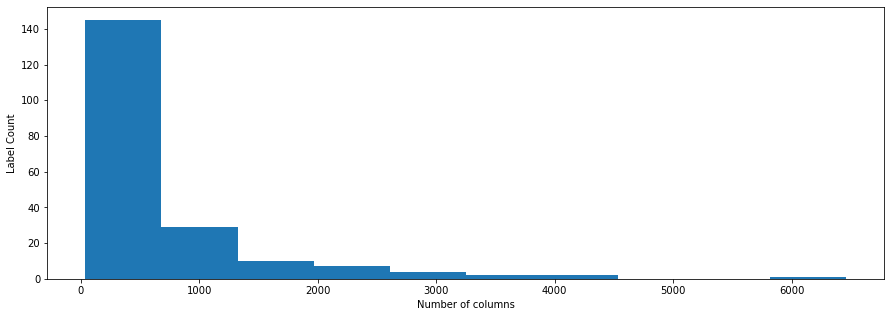

In [40]:
plt.figure(figsize=(15,5))
plt.hist(label_and_number_train.values(), bins=10)
plt.ylabel('Label Count')
plt.xlabel('Number of columns')

### Validation set

In [41]:
#Count how many columns per label
label_and_number_val = {}
for row in X_val:
    
    for label in file_to_label[row[0]].split(','):
        if label in label_and_number_val:
            label_and_number_val[label] += 1
        else:
            label_and_number_val[label] = 1
print('Number of unique relation labels in validation set: '+ str(len(label_and_number_val)))

Number of unique relation labels in validation set: 200


In [42]:
label_and_number_val.values()

dict_values([89, 94, 64, 52, 376, 213, 438, 277, 174, 194, 349, 896, 31, 486, 181, 42, 469, 206, 220, 61, 84, 76, 102, 170, 122, 29, 218, 8, 8, 12, 31, 32, 35, 160, 142, 24, 24, 18, 180, 39, 498, 25, 20, 7, 8, 40, 34, 446, 400, 246, 92, 153, 60, 28, 109, 63, 46, 7, 52, 28, 5, 30, 134, 30, 419, 307, 6, 118, 273, 324, 331, 31, 269, 48, 210, 208, 22, 33, 41, 15, 27, 9, 16, 5, 23, 96, 9, 12, 12, 12, 5, 38, 42, 43, 41, 35, 15, 34, 8, 16, 11, 22, 62, 10, 15, 8, 17, 100, 37, 73, 18, 13, 14, 20, 7, 37, 39, 51, 37, 130, 40, 33, 14, 8, 19, 22, 93, 9, 14, 31, 124, 57, 109, 40, 38, 17, 36, 31, 9, 5, 22, 28, 19, 9, 209, 104, 143, 36, 50, 11, 23, 14, 30, 56, 72, 41, 61, 40, 45, 60, 37, 124, 40, 30, 35, 34, 32, 6, 34, 69, 116, 127, 107, 81, 80, 40, 45, 67, 53, 96, 100, 99, 86, 84, 84, 78, 62, 88, 70, 77, 64, 15, 10, 9, 37, 16, 16, 10, 9, 10])

In [43]:
print('Minimum column count per label is: '+str(min(label_and_number_val.values())) )
print('Maximum column count per label is: '+str(max(label_and_number_val.values())) )
print('Total column count is: '+str(sum(label_and_number_val.values())) )

Minimum column count per label is: 5
Maximum column count per label is: 896
Total column count is: 16960


Text(0.5, 0, 'Number of columns')

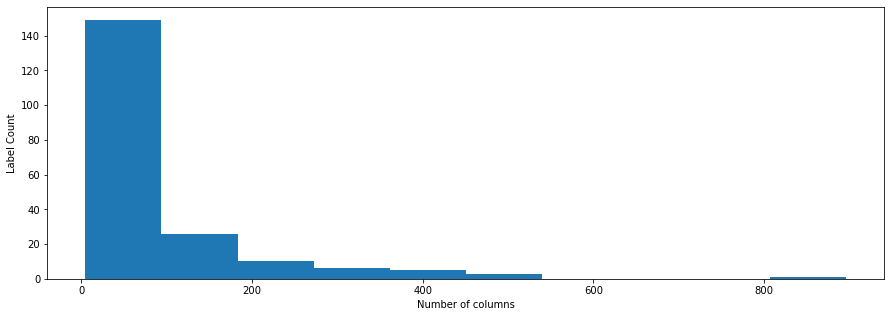

In [44]:
plt.figure(figsize=(15,5))
plt.hist(label_and_number_val.values(), bins=10)
plt.ylabel('Label Count')
plt.xlabel('Number of columns')

### Testing set

In [45]:
#Count how many columns per label
label_and_number_test = {}
for row in X_test:
    
    for label in file_to_label[row[0]].split(','):
        if label in label_and_number_test:
            label_and_number_test[label] += 1
        else:
            label_and_number_test[label] = 1
print('Number of unique relation labels in testing set: '+ str(len(label_and_number_test)))

Number of unique relation labels in testing set: 200


In [46]:
label_and_number_test.values()

dict_values([468, 372, 105, 205, 346, 901, 87, 487, 203, 438, 219, 57, 53, 56, 71, 171, 227, 164, 29, 12, 33, 84, 76, 46, 41, 285, 10, 9, 114, 163, 238, 32, 31, 35, 164, 145, 24, 26, 31, 9, 20, 18, 42, 499, 172, 8, 445, 400, 245, 39, 150, 31, 63, 109, 68, 51, 29, 29, 149, 51, 5, 85, 29, 6, 7, 325, 409, 211, 212, 30, 269, 42, 274, 322, 21, 26, 26, 13, 47, 303, 27, 119, 105, 8, 5, 25, 13, 13, 12, 8, 12, 44, 38, 43, 35, 36, 14, 41, 16, 8, 8, 22, 17, 11, 63, 16, 8, 30, 112, 71, 14, 13, 8, 19, 15, 36, 39, 65, 45, 39, 37, 95, 56, 15, 37, 40, 120, 118, 31, 9, 14, 40, 125, 34, 21, 7, 19, 20, 8, 10, 6, 25, 39, 23, 10, 31, 143, 52, 35, 209, 74, 116, 30, 48, 57, 56, 37, 52, 103, 62, 19, 39, 34, 13, 33, 7, 7, 29, 45, 129, 118, 111, 102, 101, 86, 39, 68, 59, 84, 84, 70, 77, 80, 86, 74, 34, 70, 78, 68, 94, 58, 24, 12, 13, 17, 17, 38, 36, 11, 14])

In [47]:
print('Minimum column count per label is: '+str(min(label_and_number_test.values())) )
print('Maximum column count per label is: '+str(max(label_and_number_test.values())) )
print('Total column count is: '+str(sum(label_and_number_test.values())) )

Minimum column count per label is: 5
Maximum column count per label is: 901
Total column count is: 17062


Text(0.5, 0, 'Number of columns')

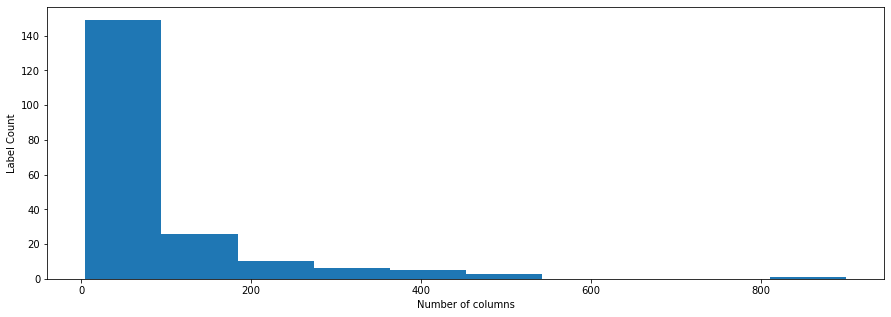

In [48]:
plt.figure(figsize=(15,5))
plt.hist(label_and_number_test.values(), bins=10)
plt.ylabel('Label Count')
plt.xlabel('Number of columns')

## Prepare csv file for each set

In [49]:
training_tables = [ table[0] for table in X_train ]
validation_tables = [ table[0] for table in X_val ]
testing_tables = [ table[0] for table in X_test ]

In [50]:
training_set = dataset.loc[dataset['file_name'].isin(training_tables)]
training_set

,class,column_name,file_name,relation_label,type_label,density,selection_type,values
7,Product,offers:price,Product_winehousegvl.com_September2020.json.gz,price,price,100,Value Heterogeneity,"[28, 26, 20, 29, 23, 20, 26, 27, 20, 22, 26, 2..."
8,Product,offers:price,Product_juvenileplanet.com_September2020.json.gz,price,price,80,Value Heterogeneity,"[27.3, 44.0, 44.0, 44.0, nan, 53.99, 0.0, 429...."
9,Product,offers:price,Product_uppolomallets.com_September2020.json.gz,price,price,100,Value Heterogeneity,"[7.29, 159.99, 31.99, 26.99, 200.0, 100.0, 35...."
10,Product,offers:price,Product_tradefireworks.co.uk_September2020.jso...,price,price,100,Value Heterogeneity,"[8, 30, 10, 75, 80, 130, 15, 15, 50, 12, 30, 7..."
11,Product,offers:price,Product_andgifts.co.uk_September2020.json.gz,price,price,100,Value Heterogeneity,"[1.29, 2.75, 5.5, 1.25, 2.25, 5.5, 7.99, 2.75,..."
...,...,...,...,...,...,...,...,...
163151,MusicAlbum,numtracks,MusicAlbum_elviscarden.com_September2020.json.gz,numTracks,Integer,100,Random 3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
163152,MusicAlbum,track:name,MusicAlbum_elviscarden.com_September2020.json.gz,track,MusicRecording,100,Random 3,"[IT\""S RAINING IN NASHVILLE, MR.RAIN MAN, Mr.R..."
163153,CreativeWork,datecreated,CreativeWork_ywbc.org.uk_September2020.json.gz,dateCreated,DateTime,100,Inter Similarity,"[2019-12-22T12:55:44+00:00, 2020-01-05T21:10:2..."
163154,CreativeWork,author:name,CreativeWork_ywbc.org.uk_September2020.json.gz,author,Person,100,Random,"[Rev Richard Alford, Phil Jackman, Phil Jackma..."


In [51]:
validation_set = dataset.loc[dataset['file_name'].isin(validation_tables)]
validation_set

,class,column_name,file_name,relation_label,type_label,density,selection_type,values
5,Event,startdate,Event_davidlohmueller.com_September2020.json.gz,startDate,DateTime,100,Intra similarity,"[2021-05-04T19:00:00+01:00, 2021-03-07T17:30:0..."
6,Event,enddate,Event_davidlohmueller.com_September2020.json.gz,endDate,DateTime,100,Intra similarity,"[2021-05-04T21:30:00+01:00, 2021-03-07T19:00:0..."
74,Person,telephone,Person_archibaldrealestate.com_September2020.j...,telephone,telephone,100,Value Heterogeneity,"[Cell: (208) 589-8120, [Office: (208) 745-5911..."
75,Person,jobtitle,Person_archibaldrealestate.com_September2020.j...,jobTitle,Text,28,Random,"[Sales Associate, None, None, Sales Associate,..."
99,Product,offers:price,Product_aimcouture.com_September2020.json.gz,price,price,100,Value Heterogeneity,"[65, 75, 75, 95, 49, 165, 385, 195, 125, 65, 6..."
...,...,...,...,...,...,...,...,...
163127,CreativeWork,contentlocation,CreativeWork_jcj.com_September2020.json.gz,contentLocation,Place,100,Random 3,"[Crownpoint, NM & Tuba City, AZ, Hartford, CT,..."
163130,Book,numberofpages,Book_lanternpublishing.com_September2020.json.gz,numberOfPages,Integer,100,Inter Similarity,"[102, 264, 100, 226, 154, 160, 184, 178, 224, ..."
163131,Book,description,Book_lanternpublishing.com_September2020.json.gz,description,Text,100,Random,[A handy pocket guide to help mental health st...
163132,Book,author:name,Book_lanternpublishing.com_September2020.json.gz,author,Person,100,Random,"[[Angelina Chadwick, Maxine Womack, Luke Woodh..."


In [52]:
testing_set = dataset.loc[dataset['file_name'].isin(testing_tables)]
testing_set

,class,column_name,file_name,relation_label,type_label,density,selection_type,values
0,Product,offers:price,Product_corememoriesco.com_September2020.json.gz,price,price,100,Value Heterogeneity,"[7.25, 24.95, 26.95, 24.95, 39.95, 24.95, 26.9..."
1,Product,url,Product_corememoriesco.com_September2020.json.gz,url,URL,100,Random,[https://corememoriesco.com/products/be-prepar...
2,Product,offers:pricecurrency,Product_corememoriesco.com_September2020.json.gz,priceCurrency,currency,100,Random,"[USD, USD, USD, USD, USD, USD, USD, USD, USD, ..."
3,Product,offers:description,Product_corememoriesco.com_September2020.json.gz,description,Text,100,Random,"[For the truly fearless!, This t-shirt is ever..."
4,Product,image,Product_corememoriesco.com_September2020.json.gz,image,URL,100,Random,[//cdn.shopify.com/s/files/1/2781/6282/product...
...,...,...,...,...,...,...,...,...
163146,CreativeWork,datemodified,CreativeWork_gsx-r1000.de_September2020.json.gz,dateModified,DateTime,100,Random,"[2013-10-29T21:00:57+01:00, 2014-03-05T19:45:3..."
163147,CreativeWork,description,CreativeWork_gsx-r1000.de_September2020.json.gz,description,Text,91,Random,"[Quelle: www.gs-classic.de © GSX-R1000.de, Pro..."
163148,CreativeWork,version,CreativeWork_gsx-r1000.de_September2020.json.gz,version,Text,75,Random,"[2013-10-29, 2014-03-05, None, None, 29.11.201..."
163149,CreativeWork,author:name,CreativeWork_gsx-r1000.de_September2020.json.gz,author,Person,100,Random,"[McViesch, gsxr1000k5lkm, gsxr1000k5lkm, gsxr1..."


In [ ]:
#Manual corrections:
#Remove some types that do not have at least 10 examples in test set
#Remove tables with less than 10% density

exclude = ['petsAllowed',
  'foundingDate',
  'size',
  'musicBy',
  'honorificPrefix',
  'honorificSuffix',
  'isicV4',
  'isFamilyFriendly',
  'contentLocation',
  'availabilityStarts',
  'availabilityEnds',
  'starRating',
  'deathPlace',
  'publication',
  'maximumAttendeeCapacity',
  'remainingAttendeeCapacity',
  'funder',
  'industry',
    'name',
    'audience'
]

training_set = training_set.loc[~training_set['relation_label'].isin(exclude)]
training_set = training_set.loc[training_set['density'] >= 10 ]

validation_set = validation_set.loc[~validation_set['relation_label'].isin(exclude)]
validation_set = validation_set.loc[validation_set['density'] >= 10 ]

testing_set = testing_set.loc[~testing_set['relation_label'].isin(exclude)]
testing_set = testing_set.loc[testing_set['density'] >= 10 ]

In [ ]:
with open('output-data/relation_vocab.txt', 'a') as file:
    i = 0
    for label in testing_set['relation_label'].unique():
        file.write(str(i)+ '\t' + label +'\n')
        i += 1

### Create small subset of training set

In [ ]:
grouped_by_table = dataset.groupby(['file_name'])['relation_label'].apply(','.join).reset_index()
grouped_by_table

In [ ]:
X = grouped_by_table[["file_name"]].values

In [ ]:
types_file = open("output-data/relation_vocab.txt", 'r')
all_labels = [line.replace('\n', '').split('\t')[1] for line in types_file.readlines()]

In [ ]:
y = np.zeros(shape=(33679, 180)) #encoded labels

In [ ]:
for index, row in grouped_by_table.iterrows():
    table_labels = row['relation_label'].split(',')
    count = 0
    
    for label in all_labels:
        if label in table_labels:
            y[index][count] = 1
        else:
            y[index][count] = 0
        count += 1

In [ ]:
X_rest, y_rest, X_test, y_test = iterative_train_test_split(X, y, test_size = 0.25)
print('Training set length: '+str(len(X_rest)) +', Testing set length: '+ str(len(X_test)))

In [ ]:
#Relation Labels in each set
pd.DataFrame({
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_rest, order=1) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=1) for combination in row)
}).T.fillna(0.0)

In [ ]:
training_tables = [ table[0] for table in X_test ]
training_set_small = dataset.loc[dataset['file_name'].isin(training_tables)]
training_set_small

### Save splits in files

In [53]:
training_set.to_csv('output-data/training_set.csv.gz', index=False, compression='gzip')

In [53]:
training_set_small.to_csv('output-data/training_set.csv.gz', index=False, compression='gzip')

In [54]:
validation_set.to_csv('output-data/validation_set.csv.gz', index=False, compression='gzip')

In [55]:
testing_set.to_csv('output-data/testing_set.csv.gz', index=False, compression='gzip')